# Motor de corrent continu d'excitació sèrie

## Condicions nominals

Podem representar la versió més senzilla d'aquest motor amb el següent esquema:

![](img/MaqElec/motorDCes.png)

Apliquem la llei de Kirchoff de les malles:

$\Large U - \varepsilon = I \cdot (r + R_s) \Rightarrow I = \frac{U-\varepsilon}{r+R_s} $

## Inversió de gir

No és possible, caldria canviar internament la connexió dels components, o un dispositiu mecànic a la sortida de l'eix.

Justament per aquest motiu aquest motor també es pot utilitzar amb corrent altern. Per això se'l coneix també amb el nom de **motor universal**

## Comportament a l'engegada

Anàlogament als casos anteriors, haurem de posar en sèrie un reostat $Ra$ en sèrie a l'engegada per limitar la intensitat:


$I_a = \alpha \cdot I_n$ 

$1,5 \le \alpha \le 2,5$

Però ara el flux canviarà a l'engegada, ja que el produeix la pròpia $I_a$

Si escrivim l'equació del moment per l'engegada i les condicions nominals i les dividim:

$ \Gamma_a = k \cdot \Phi_a \cdot I_a$

$ \Gamma_n = k \cdot \Phi \cdot I_n$

$\Large \frac{\Gamma_a}{\Gamma_n}  = \frac{\phi_a}{\phi_n} \cdot \frac{I_a}{I_n} = \alpha \cdot \alpha \Rightarrow  \Gamma_a =  \alpha^2 \cdot \Gamma_n$

Es a dir, si dupliquem la intensitat a l'engegada **quadrupliquem** el parell

## Corbes característiques

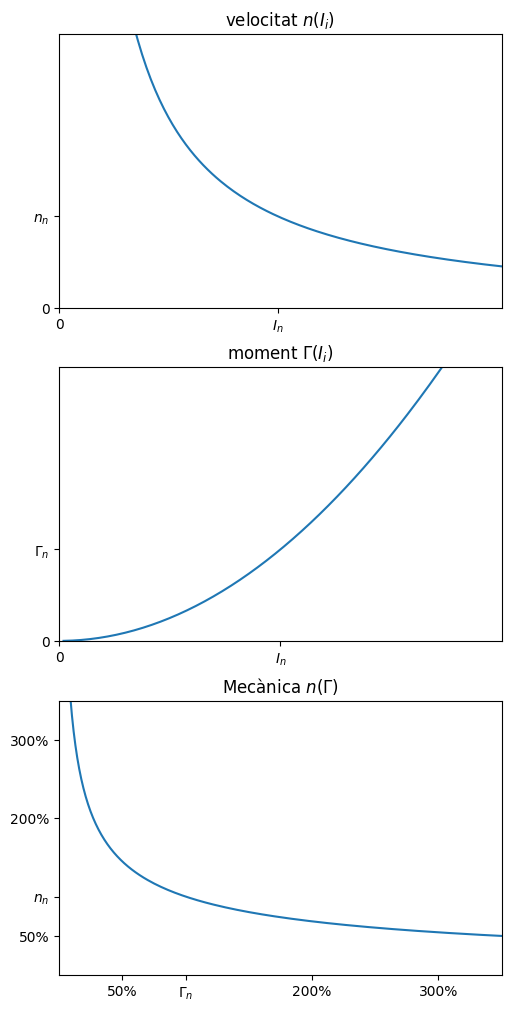

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
Ri=0.75
Re=0.25
Un=200
nn=800
In=15
En=Un-In*(Ri+Re)
Pn=In*En
wn=nn*2*pi/60
kphin=En/wn
etan=Pn/(In*Un)
gn=kphin*In
x = np.linspace(0.02, 3, 300)
I = x*In
kphi=kphin*I/In
g = kphi*I 
e = Un-I*(Ri+Re)
w = e/kphi
eta=e*I/(Un*I)

ffig, axs = plt.subplots(3, 1, figsize=(5, 10), layout='constrained')

axs[0].plot(I/In, w/wn)
axs[0].axis([0, 2.02, 0, 3])
axs[0].set_xticks([0,1], ['0','$I_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('velocitat $n(I_i)$')

axs[1].plot(I/In, g/gn)
axs[1].axis([0, 2, 0, 3])
axs[1].set_xticks([0,1], ['0','$I_n$'])
axs[1].set_yticks([0,1], ['0','$\Gamma_n$'])
axs[1].set_title('moment $\Gamma(I_i$)')

axs[2].plot(g/gn, w/wn)
axs[2].axis([0, 3.5, 0, 3.5])
axs[2].set_yticks([0.5,1,2,3], ['50%','$n_n$','200%','300%'])
axs[2].set_xticks([0.5,1,2,3], ['50%','$\Gamma_n$','200%','300%'])
axs[2].set_title('Mecànica $n(\Gamma)$')

plt.show()

## Aplicacions

Com veiem aquest motor la variació de la càrrega modifica molt la velocitat, desenvolupant un parell amb dependència quadràtica amb el corrent. Per aquest motiu no es pot fer servir en sistemes on la càrrega pot ser bruscament suprimida, especialment a l'engegada, aon hi ha perill d'embalar-se. Però es un motor robust, que soporta millor les sobrecàrregues que els motors que hem vist anteriorment, ja que les bobines d'excitàció són de gran secció i poques espires.

Pe tot això és molt recomanable per tracció elèctrica (trens i tramvies), on es necessita un gran parell a l'engegada i les resistències pasives són importants en tot moment. En pujar rampes es necessita incrementar notablement el parell motor amb disminució de la velocitat, mantenint pràcticament el consum de la línia. Si fessim servir un motor derivació, que manté una velocitat constant, l'increment del parell implicaria un increment del consum de la línia. 

## Rendiment

Aquest motor té un rendiment nominal:

$$\Large \eta = \frac{P_u}{P_c} = \frac{\varepsilon \cdot I}{U \cdot I} = \frac{\varepsilon}{U}$$

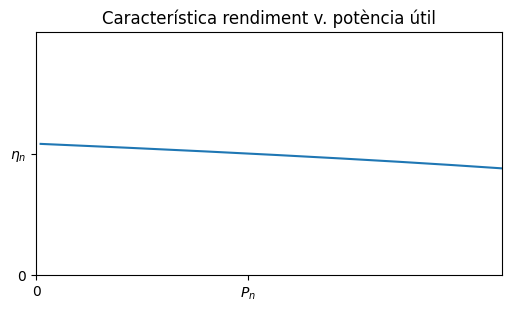

In [2]:
p=I*e

fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ax.plot(p/Pn, eta/etan)
ax.axis([0, 2.2, 0, 2])
ax.set_xticks([0,1], ['0','$P_n$'])
ax.set_yticks([0,1], ['0','$\eta_n$'])
ax.set_title('Característica rendiment v. potència útil')

plt.show()

## Exemple

**PAU ELECTROTÈCNIA 1998 S2 3A**

![](img/MaqElec/PAUEL1998S2P3A.png)

a)

In [3]:
from math import pi
Un=200
In=15
r=0.75
Rs=0.25
nn=800
omegan=nn*2*pi/60
epsilonn=Un-In*(r+Rs)
Pn=epsilonn*In
etan=Pn/(Un*In)
etan

0.925

$\eta = 92,5\%$

b)

$\Large \varepsilon = k \cdot \Phi \cdot \omega$

Com $I=I_n \ \Rightarrow  \Phi = \Phi_n$ 

$\Large \varepsilon_n = k \cdot \Phi_n \cdot \omega_n$

$\Large \varepsilon = k \cdot \Phi_n \cdot \omega$

$\Large \frac{\varepsilon}{\varepsilon_n} = \frac{\omega}{\omega_n} = \frac{n}{n_n} \Rightarrow  \varepsilon = \frac{n}{n_n} \cdot \varepsilon_n $

In [4]:
n=500
epsilon = n/nn * epsilonn
U = epsilon + In*(r+Rs)
U

130.625

$U = 130.6 \ V$

c)

$\Large \varepsilon = k \cdot \Phi \cdot \omega$

Com $I=I_n \ \Rightarrow  \Phi = \Phi_n$ 

$\Large \varepsilon_n = k \cdot \Phi_n \cdot \omega_n$

$\Large \varepsilon = k \cdot \Phi_n \cdot \omega$

$\Large \frac{\varepsilon}{\varepsilon_n} = \frac{\omega}{\omega_n} = \frac{n}{n_n} \Rightarrow  n = \frac{\varepsilon}{\varepsilon_n} \cdot n_n $

In [5]:
R1=2
epsilon=Un-In*(r+Rs+R1)
n=epsilon/epsilonn*nn
n

670.2702702702703

$n = 670,3 \ min^{-1}$